# Statistisk inferens: Konjugert prior

Vi kan ikke trekke ut noen funksjon for konjugert prior for beta, normalfordeling osv. fra de Python-pakkene vi har brukt. Likevel er det ikke så mye kode som skal til. Vi ser på to eksempler. Første eksempel er for betafordeling, og det andre er for normalfordeling.

### Eksempel 1
Aller først tar vi et tall-eksempel med Beta-fordelingen. Vi begynner med Jeffrey's prior, altså betafordeling med a=0.5 og b=0.5. Deretter oppdaterer vi a og b med antall suksesser og antall "feil". Ny fordeling blir da en beta-fordeling med ny a og b. Til slutt tegner vi en figur via en DataFrame, slik vi har gjort i tidligere kapitler.

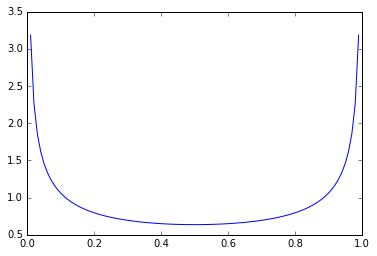

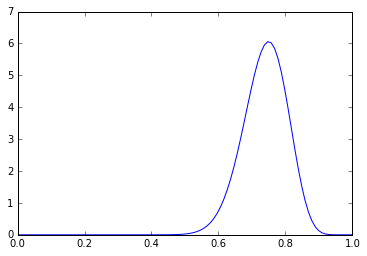

In [1]:
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import beta

# Indekser blir en liste med 100 verdier lineært fordelt fra 0 til 1.
indekser = np.linspace(0, 1, 100)

# Lage Jeffreys' prior.
a, b = 0.5, 0.5
jeffreys_prior = beta(a, b)

# Bruker prioren over alle verdiene i "indekser"-variabelen, og får prior-verdier.
prior = jeffreys_prior.pdf(indekser)

# Oppdaterer a og b med observasjoner.
a += 32 # Suksess-observasjoner (32 legges til i a)
b += 11 # Feilet-observasjoner (11 legges til i b)

# Ny fordeling med oppdatert a og b.
posterior_fordeling = beta(a, b)

# Samme som vi gjorde for prior, men nå med ny, oppdatert, fordeling.
posterior = posterior_fordeling.pdf(indekser)

# Plotter først Jeffreys' prior
df = DataFrame(prior, indekser)
df.plot.line(legend=None)
plt.show()

# Og oppdatert:
df2 = DataFrame(posterior, indekser)
df2.plot.line(legend=None)
plt.show()

### Eksempel 2

Funksjonen under, gir en ny normalfordeling hvis standardavviket er kjent, og en student's t hvis ikke. Dette er rett og slett en oversettelse av fremgangsmåten fra boka, til Python. Eksempelet fortsetter under koden.

In [2]:
from scipy.stats import norm


def norm_konjugert_posterior(mu0, sigma0, observasjoner, stdav=None):
    prior = norm(mu0, sigma0)
    n = len(observasjoner)
    gjsnitt = sum(observasjoner)/n

    d0 = 1/sigma0**2
    d_data = n/stdav**2


    d1 = d0+d_data
    sigma1 = 1/d1**0.5
    mu1 = d0/d1*mu0 + d_data/d1*gjsnitt

    if stdav == None:
        return t(mu1, n-1, sigma1) # Ukjent standardavvik, returner en Student's t-fordeling
    else:
        return norm(mu1, sigma1) # Kjent standardavvik. Da blir det en ny normalfordeling

Du jobber på en kokosnøttplantasje og høster kokosnøtter, og ønsker å gjøre litt statistikk. Du mener å ha sett at en vekten til kokosnøtter er normalfordelt med $\sigma=0.4$ (kg). I dag var de første nøttene du plukket på hhv. 1.35, 1.56, 1.44 og 1.61 kg. Du bruker en prior $N_{(1.5, 0.15)}$.

Hva blir posterior?

Vi bruker funksjonen vi lagde over, og fyller inn parameterne fra oppgaven. Deretter plotter vi prior og posterior.

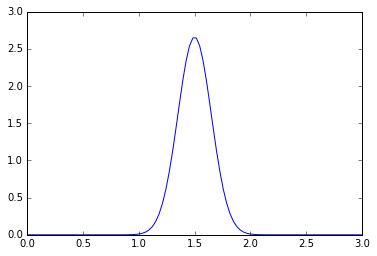

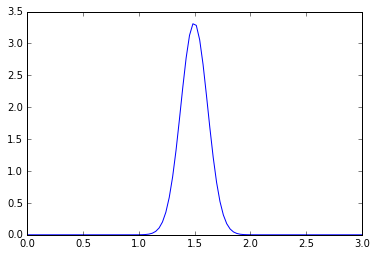

In [3]:
posterior_fordeling = norm_konjugert_posterior(
    mu0=1.5, sigma0=0.15, observasjoner=[1.35, 1.56, 1.44, 1.61], stdav=0.4
) # Parameternavn tatt med for klarhetens skyld. Siste parameter er frivillig.


indekser = np.linspace(0, 3, 100)

prior_fordeling = norm(1.5, 0.15)
prior = prior_fordeling.pdf(indekser)
posterior = posterior_fordeling.pdf(indekser)


df = DataFrame(prior, indekser)
df.plot.line(legend=None)
plt.show()

df2 = DataFrame(posterior, indekser)
df2.plot.line(legend=None)
plt.show()

Og hva er sannsynligheten for at forventet vekt på en kokosnøtt er mindre enn 1.41 kg?

In [4]:
posterior_fordeling.cdf(1.41)

0.23576249777925101